# Ce notebook permet de faire de la reconaissnace de chiffre écrit à la main en utilisant un réseau de neurones convolutif. 

#### Emilie Niclin / Pierre ALLA / E4FI - Groupe 3


### Introduction à la reconnaissance des chiffres manuscrits avec l'apprentissage profond

L'objectif de ce projet est de développer un système de reconnaissance des chiffres manuscrits en utilisant des techniques d'apprentissage profond. 
Plus précisément, nous allons explorer deux types de réseaux neuronaux : les réseaux de neurones multicouches et les réseaux de neurones convolutifs.

### Comparaison du modèle de réseau de neurones multicouches et du modèle de réseau de neurones convolutif

Les réseaux de neurones multicouches sont des modèles d'apprentissage automatique qui sont composés de plusieurs couches de neurones interconnectés. Chaque couche traite les informations reçues de la couche précédente et les transmet à la couche suivante. Ces réseaux sont capables d'apprendre des représentations complexes de données en utilisant des fonctions d'activation non linéaires.

D’autres modèles particulièrement adaptés à la reconnaissance d'images sont les modèles de réseaux de neurones convolutifs. Ceux-ci comportent deux parties principales. La première partie est composée de couches de neurones spéciales appelées "couches de convolution" qui filtrent les caractéristiques importantes des images. La deuxième partie est composée de couches entièrement connectés appelées « perceptron multicouche » (MLP) qui prennent les caractéristiques extraites par les couches de CNN et les utilise afin de classer les images. Ces réseaux sont capables de capturer les motifs et les structures des chiffres manuscrits, ce qui les rend très efficaces pour la reconnaissance des chiffres.

#### import : 

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Chargement des données MNIST

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalisation des données pour faciliter l'apprentissage du réseau : 

In [20]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Création d'un modèle simple de réseau de neurones multicouches (4 couches)

In [21]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

Création d'un modèle simple de réseau de neurones multicouches avec convolution (4 couches)

In [22]:
model_conv = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compilation des modèles

In [23]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

model_conv.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


Vérification des modèles

In [24]:
model.summary()

model_conv.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement des modèles

In [25]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

history_conv = model_conv.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8565 - loss: 0.4896 - val_accuracy: 0.9685 - val_loss: 0.1191
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9542 - loss: 0.1575 - val_accuracy: 0.9740 - val_loss: 0.0925
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9654 - loss: 0.1126 - val_accuracy: 0.9750 - val_loss: 0.0829
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9721 - loss: 0.0906 - val_accuracy: 0.9773 - val_loss: 0.0770
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9755 - loss: 0.0745 - val_accuracy: 0.9788 - val_loss: 0.0727
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8946 - loss: 0.3424 - val_accuracy: 0.9868 - val_loss: 0.0505
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0495 - val_accuracy: 0.9850 - val_loss: 0.0527
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0335 - val_accu

Évaluation des modèles

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

test_loss_conv, test_acc_conv = model_conv.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print('Test accuracy:', test_acc_conv)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.0886
Test accuracy: 0.9757000207901001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0332
Test accuracy: 0.9915000200271606


Afficher les performances des modèles

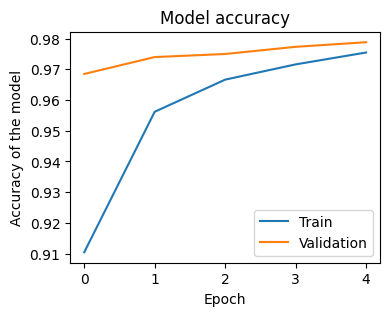

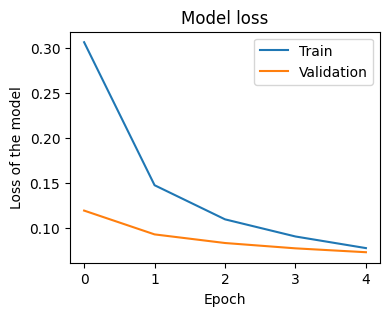

Ajoutons la convolution : 


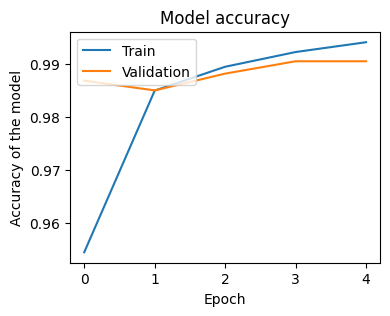

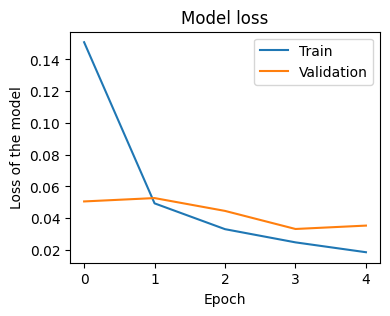

In [27]:
plt.figure(figsize=(4, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

print("Ajoutons la convolution : ")

plt.figure(figsize=(4, 3))
plt.plot(history_conv.history['accuracy'])
plt.plot(history_conv.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Évaluer les modèles

In [28]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

scores_conv = model_conv.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print("Accuracy: %.2f%%" % (scores_conv[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.9715 - loss: 0.0886
Accuracy: 97.57%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0332
Accuracy: 99.15%


Prédiction et visualisation des résultats

In [29]:
predictions = model.predict(x_test[:6])

print("Avec convolution")

predictions_conv = model.predict(x_test[:6])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Avec convolution
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


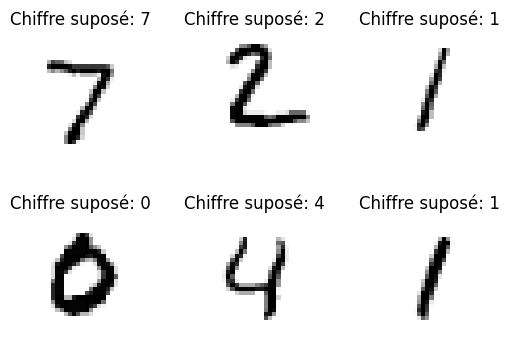

----------------
Avec convolution


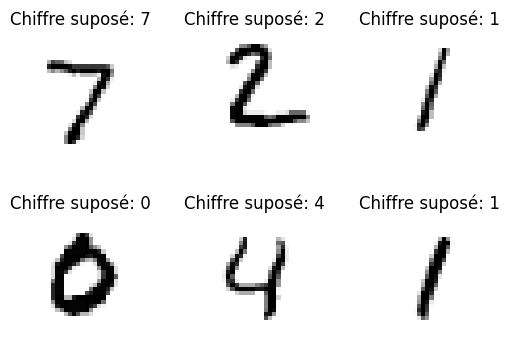

In [30]:
import matplotlib.pyplot as plt

plots_per_row = 3

num_predictions = len(predictions)
num_rows = (num_predictions + plots_per_row - 1) // plots_per_row  

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 2, num_rows * 2))

for i, (prediction, ax) in enumerate(zip(predictions, axes.flatten())):
    ax.imshow(x_test[i], cmap=plt.cm.binary)
    ax.set_title(f"Chiffre suposé: {prediction.argmax()}")
    ax.axis('off')

for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  
plt.show()

print("----------------")
print("Avec convolution")

num_predictions_conv = len(predictions_conv)
num_rows_conv = (num_predictions_conv + plots_per_row - 1) // plots_per_row 

fig, axes = plt.subplots(num_rows_conv, plots_per_row, figsize=(plots_per_row * 2, num_rows_conv * 2))

for i, (prediction, ax) in enumerate(zip(predictions_conv, axes.flatten())):
    ax.imshow(x_test[i], cmap=plt.cm.binary)
    ax.set_title(f"Chiffre suposé: {prediction.argmax()}")
    ax.axis('off')

for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


Test des codes avec des images faites à la main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


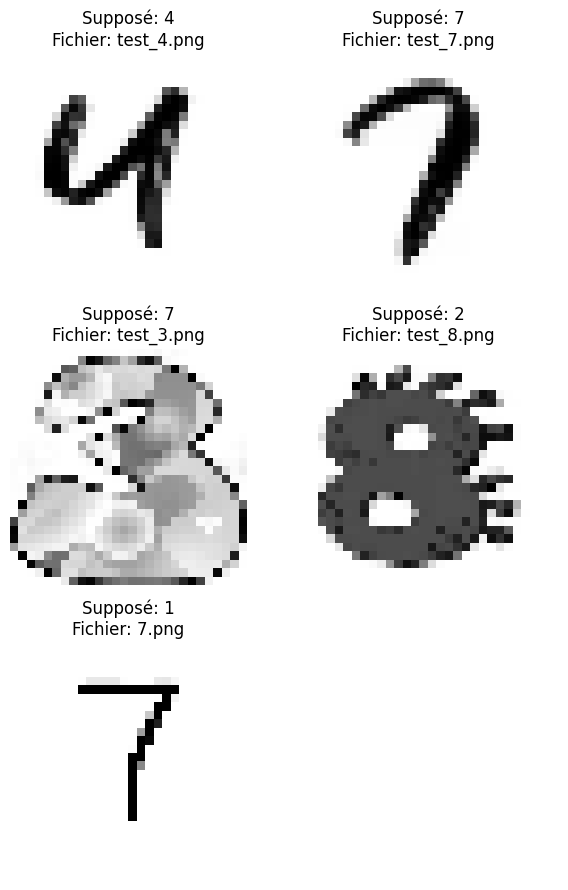

Avec convolution
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


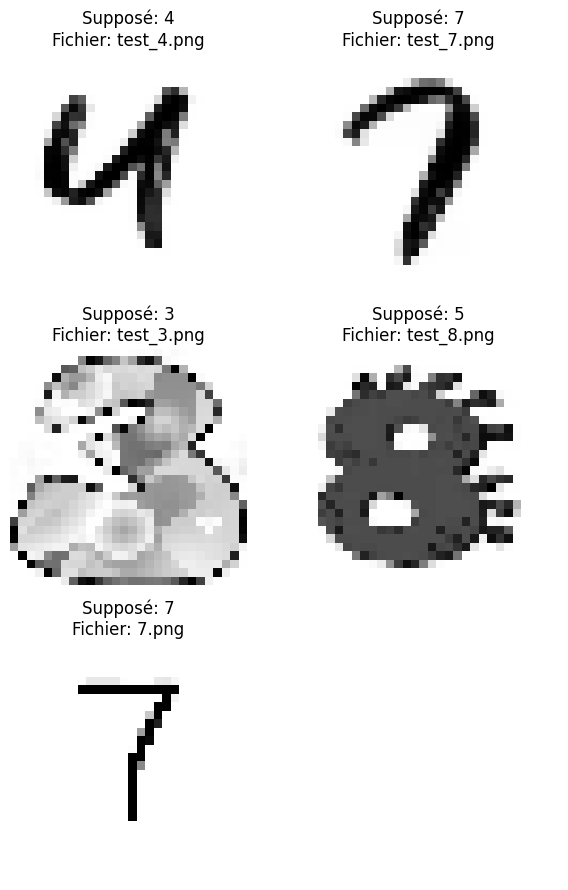

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

files_name = ['test_4.png', 'test_7.png', 'test_3.png', 'test_8.png', '7.png']

plots_per_row = 2

def process_and_predict(file_name, model, conv=False):
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    if conv:
        img = img.reshape(1, 28, 28, 1)
    else:
        img = img.reshape(1, 28, 28)
    return img, model.predict(img)

num_files = len(files_name)
num_rows = (num_files + plots_per_row - 1) // plots_per_row 

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 3, num_rows * 3))

for i, file_name in enumerate(files_name):
    img, prediction = process_and_predict(file_name, model)
    ax = axes[i // plots_per_row, i % plots_per_row]
    ax.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title(f"Supposé: {prediction.argmax()}\nFichier: {file_name}")
    ax.axis('off')

for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

print("Avec convolution")

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 3, num_rows * 3))

for i, file_name in enumerate(files_name):
    img, prediction = process_and_predict(file_name, model_conv, conv=True)
    ax = axes[i // plots_per_row, i % plots_per_row]
    ax.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title(f"Supposé: {prediction.argmax()}\nFichier: {file_name}")
    ax.axis('off')

for j in range(i + 1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


## Conclusion

En conclusion, ce projet vise à comparer la précision de deux modèles pour la reconnaissance de chiffres manuscrits. Le premier utilisant les réseaux de neurones multicouches et le second utilisant les réseaux de neurones convolutifs. Après analyse des résultats on remarque que le modèle utilisant les réseaux de neurones multicouches avec convolution est plus précis que celui sans convolution.


- Précision du réseaux de neurones multicouches : 97.59%
- Précision réseaux de neurones convolutif: 98.97%

On remarque aussi ci-dessus que le model convolutif est plus précis que le model multicouches. Il reconnait mieux les chiffres écrits à la main que nous lui avons donné nous mêmes. 

(cf 3 et 8)
![alt text](test_3.png) ![alt text](test_8.png)